In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/home/pedranji/Projects/anomaly-detection-train/data/MetroPT3(AirCompressor).csv")

# show how much this datasets spans across time
df["timestamp"] = pd.to_datetime(df["timestamp"])
print(df["timestamp"].min())
print(df["timestamp"].max())

df.set_index("Unnamed: 0", inplace=True)
df.drop("timestamp", axis=1, inplace=True)
df.rename(columns={"DV_eletric": "DV_electric"}, inplace=True)
df.columns

2020-02-01 00:00:00
2020-09-01 03:59:50


Index(['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature',
       'Motor_current', 'COMP', 'DV_electric', 'Towers', 'MPG', 'LPS',
       'Pressure_switch', 'Oil_level', 'Caudal_impulses'],
      dtype='object')

### Column Description

- TP2 (bar) – the measure of the pressure on the compressor.
- TP3 (bar) – the measure of the pressure generated at the pneumatic panel.
H1 (bar) – the measure of the pressure generated due to pressure drop when the discharge of the cyclonic
separator filter occurs.
- DV pressure (bar) – the measure of the pressure drop generated when the towers discharge air dryers; a zero
reading indicates that the compressor is operating under load.
- Reservoirs (bar) – the measure of the downstream pressure of the reservoirs, which should be close to the
pneumatic panel pressure (TP3).
- Motor Current (A) – the measure of the current of one phase of the three-phase motor; it presents values close to
0A - when it turns off, 4A - when working offloaded, 7A - when working under load, and 9A - when it starts
working.
- Oil Temperature (ºC) – the measure of the oil temperature on the compressor.
- COMP - the electrical signal of the air intake valve on the compressor; it is active when there is no air intake,
indicating that the compressor is either turned off or operating in an offloaded state.
- DV electric – the electrical signal that controls the compressor outlet valve; it is active when the compressor is
functioning under load and inactive when the compressor is either off or operating in an offloaded state.
- TOWERS – the electrical signal that defines the tower responsible for drying the air and the tower responsible
for draining the humidity removed from the air; when not active, it indicates that tower one is functioning; when
active, it indicates that tower two is in operation.
- MPG – the electrical signal responsible for starting the compressor under load by activating the intake valve
when the pressure in the air production unit (APU) falls below 8.2 bar; it activates the COMP sensor, which assumes
the same behaviour as the MPG sensor.
- LPS – the electrical signal that detects and activates when the pressure drops below 7 bars.
- Pressure Switch - the electrical signal that detects the discharge in the air-drying towers.
- Oil Level – the electrical signal that detects the oil level on the compressor; it is active when the oil is below the
expected values.
- Caudal Impulse – the electrical signal that counts the pulse outputs generated by the absolute amount of air
flowing from the APU to the reservoirs.



# Ideas
- Predictive Maintenance
- Anomaly Detection
- RNN for time series analysis (don't know what the target would be)
- Analyze seasonal patterns
- Analyze Energy efficiency trends

---

### Anomaly Detection
This consists of finding patterns in the data that do not conform to expected behavior. This is useful for finding outliers in the data, and for detecting unexpected events that may be indicative of a problem or issue. This could be used to trigger a maintenance request before the equipment fails, which could save time and money.

### Options for model architectures

- **Isolation Forest**:
   - Ensemble method for efficient anomaly isolation, suitable for high-dimensional data.
   <br></br> 
- **One-Class SVM (Support Vector Machine)**:
   - Learns normal data boundaries and detects anomalies outside those boundaries.
<br></br>
- **Autoencoders**:
   - Neural networks that identify anomalies based on high reconstruction errors.
<br></br>
- **Density-Based Clustering (DBSCAN)**:
   - Identifies anomalies as data points not fitting well into clusters.
<br></br>
- **K-means Clustering**:
   - Anomalies are data points not belonging to clusters or in small clusters.
<br></br>
- **Local Outlier Factor (LOF)**:
   - Calculates local data point density to detect anomalies.
<br></br>
- **PCA-Based Methods**:
   - Uses PCA for dimensionality reduction and identifies anomalies by high reconstruction errors.
<br></br>
- **Time Series Anomaly Detection**:
   - Techniques like STL, ARIMA, or state-space models for time series data.



***

### Isolation Forest

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import numpy as np


df_scaled = StandardScaler().fit_transform(df)
X_train, X_test = train_test_split(df_scaled, test_size=0.2, random_state=42)

# fit the model
model = IsolationForest()
model.fit(X_train)

# predict the anomaly
y_pred = model.predict(X_test)

# map the prediction to binary values
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1


In [4]:
# Show the anomalous cases
df_test = pd.DataFrame(X_test, columns=df.columns)
df_test["anomaly"] = y_pred
df_test[df_test["anomaly"] == 1]

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_electric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,anomaly
9,2.673136,1.091214,-2.273538,-0.198629,1.088452,1.167206,1.730990,-2.265689,2.286097,0.295188,-2.230695,-0.058581,0.092937,0.325583,0.259065,1
13,2.109605,-0.495405,-2.273538,1.542996,-0.493859,1.788729,1.563748,-2.265689,2.286097,-3.387674,-2.230695,-0.058581,0.092937,0.325583,0.259065,1
23,1.282149,-1.387291,-2.278939,-0.193399,-1.386846,-0.267666,1.333518,-2.265689,2.286097,0.295188,-2.230695,-0.058581,0.092937,-3.071413,0.259065,1
34,2.544557,0.393352,-2.274138,-0.198629,0.392862,0.994561,1.721216,-2.265689,2.286097,0.295188,-2.230695,-0.058581,0.092937,0.325583,0.259065,1
42,2.309547,-0.952301,-2.277739,-0.209090,-0.957586,-1.480018,1.708184,-2.265689,2.286097,-3.387674,-2.230695,-0.058581,0.092937,0.325583,0.259065,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303373,2.795562,1.695193,-2.274739,-0.209090,1.693177,1.044436,1.785289,-2.265689,2.286097,0.295188,-2.230695,-0.058581,0.092937,0.325583,0.259065,1
303374,2.743885,1.419804,-2.273538,-0.198629,1.411181,-0.256156,1.767913,-2.265689,2.286097,0.295188,-2.230695,-0.058581,0.092937,0.325583,0.259065,1
303379,2.734657,1.720229,-2.273538,1.658058,1.715110,1.850113,1.779859,-2.265689,2.286097,-3.387674,-2.230695,-0.058581,0.092937,0.325583,-3.860042,1
303383,-0.425056,-3.840761,-2.273538,-0.198629,-3.840212,-1.756250,-0.881896,-2.265689,2.286097,0.295188,-2.230695,17.070311,0.092937,0.325583,0.259065,1


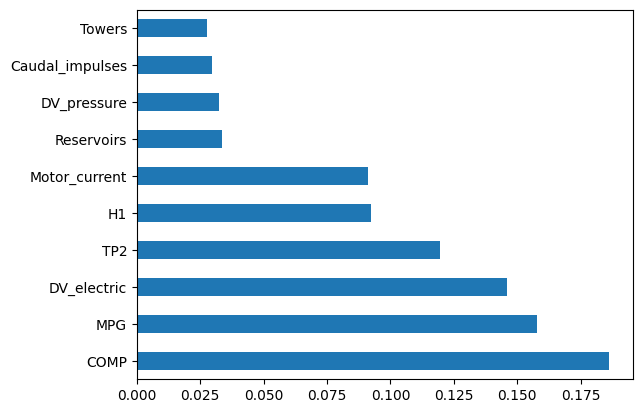

In [5]:
# Show feature importance for the df_test assuming its predictions are correct
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_test, y_pred)

# plot feature importances as a reverse bar plot (in order to see the most important features first)
feat_importances = pd.Series(rf.feature_importances_, index=df.columns)
feat_importances.nlargest(10).plot(kind="barh")
plt.show()

Here we can see the features that the model took into consideration to say if the data point is an anomaly or not. We can take a look at how "off the grid" that feature was for that data point. For example, how many standard deviations away from the mean was that data point.

In [6]:
# show how many standard deviations away from the mean the anomaly is (for each feature)
# the data is already normalized, so the mean is 0 and the std is 1
# I want to see how many stds away from the mean the anomaly is

for col in df_test.columns:
    if col == "anomaly":
        continue
    df_test[col + "_std"] = abs(df_test[col] - 1)

In [7]:
# show the anomalies
df_test[df_test["anomaly"] == 1]

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_electric,Towers,...,Oil_temperature_std,Motor_current_std,COMP_std,DV_electric_std,Towers_std,MPG_std,LPS_std,Pressure_switch_std,Oil_level_std,Caudal_impulses_std
9,2.673136,1.091214,-2.273538,-0.198629,1.088452,1.167206,1.730990,-2.265689,2.286097,0.295188,...,0.167206,0.730990,3.265689,1.286097,0.704812,3.230695,1.058581,0.907063,0.674417,0.740935
13,2.109605,-0.495405,-2.273538,1.542996,-0.493859,1.788729,1.563748,-2.265689,2.286097,-3.387674,...,0.788729,0.563748,3.265689,1.286097,4.387674,3.230695,1.058581,0.907063,0.674417,0.740935
23,1.282149,-1.387291,-2.278939,-0.193399,-1.386846,-0.267666,1.333518,-2.265689,2.286097,0.295188,...,1.267666,0.333518,3.265689,1.286097,0.704812,3.230695,1.058581,0.907063,4.071413,0.740935
34,2.544557,0.393352,-2.274138,-0.198629,0.392862,0.994561,1.721216,-2.265689,2.286097,0.295188,...,0.005439,0.721216,3.265689,1.286097,0.704812,3.230695,1.058581,0.907063,0.674417,0.740935
42,2.309547,-0.952301,-2.277739,-0.209090,-0.957586,-1.480018,1.708184,-2.265689,2.286097,-3.387674,...,2.480018,0.708184,3.265689,1.286097,4.387674,3.230695,1.058581,0.907063,0.674417,0.740935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303373,2.795562,1.695193,-2.274739,-0.209090,1.693177,1.044436,1.785289,-2.265689,2.286097,0.295188,...,0.044436,0.785289,3.265689,1.286097,0.704812,3.230695,1.058581,0.907063,0.674417,0.740935
303374,2.743885,1.419804,-2.273538,-0.198629,1.411181,-0.256156,1.767913,-2.265689,2.286097,0.295188,...,1.256156,0.767913,3.265689,1.286097,0.704812,3.230695,1.058581,0.907063,0.674417,0.740935
303379,2.734657,1.720229,-2.273538,1.658058,1.715110,1.850113,1.779859,-2.265689,2.286097,-3.387674,...,0.850113,0.779859,3.265689,1.286097,4.387674,3.230695,1.058581,0.907063,0.674417,4.860042
303383,-0.425056,-3.840761,-2.273538,-0.198629,-3.840212,-1.756250,-0.881896,-2.265689,2.286097,0.295188,...,2.756250,1.881896,3.265689,1.286097,0.704812,3.230695,16.070311,0.907063,0.674417,0.740935


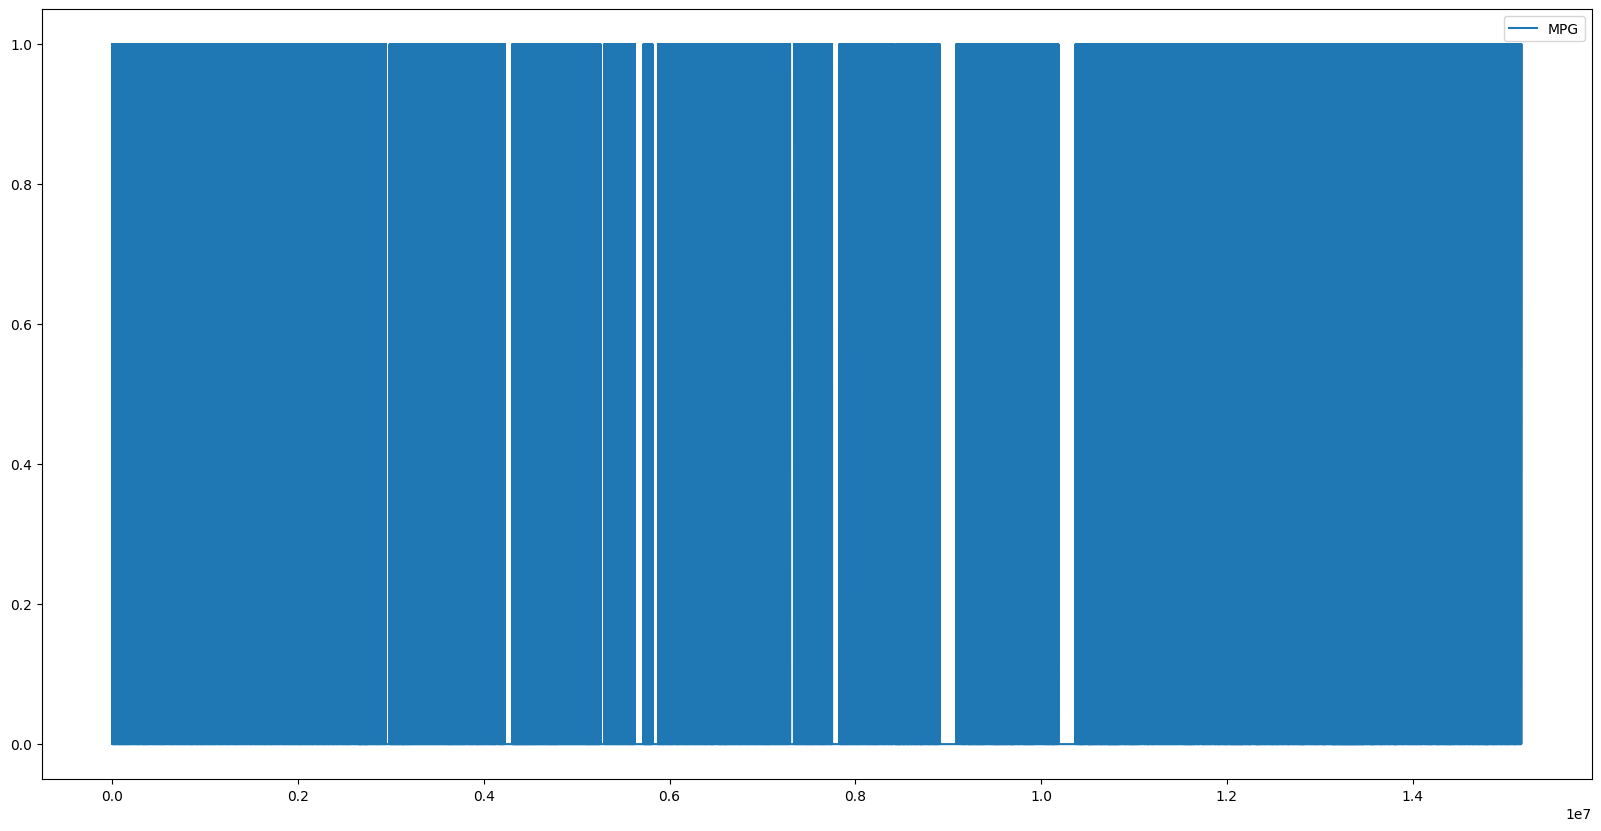

[[9, 13, 23, 34, 42, 50, 54, 55, 60, 63, 64, 65, 68, 73, 76, 86, 91, 92, 95, 97, 100, 101, 104, 106, 108, 109, 111, 121, 135, 137, 143, 146, 150, 154, 155, 172, 176, 184, 193, 199, 204, 207, 213, 215, 216, 219, 221, 222, 226, 227, 231, 234, 237, 246, 262, 263, 268, 270, 271, 272, 274, 280, 281, 284, 293, 303, 309, 310, 312, 313, 317, 318, 319, 321, 324, 330, 333, 339, 362, 363, 372, 383, 390, 396, 399, 400, 402, 406, 410, 414, 419, 422, 439, 440, 443, 449, 451, 457, 458, 459, 467, 484, 488, 491, 492, 500, 502, 503, 508, 509, 511, 513, 514, 516, 520, 525, 526, 527, 529, 534, 541, 545, 547, 548, 551, 555, 559, 560, 561, 571, 589, 591, 598, 602, 605, 606, 611, 615, 618, 621, 623, 626, 630, 634, 638, 640, 652, 655, 662, 667, 670, 672, 679, 687, 694, 696, 715, 720, 728, 731, 733, 743, 747, 748, 749, 751, 752, 765, 769, 775, 776, 777, 784, 794, 797, 798, 803, 805, 808, 810, 815, 836, 840, 851, 853, 858, 862, 870, 872, 876, 877, 884, 885, 895, 898, 899, 900, 901, 910, 929, 931, 935, 941, 949,

In [27]:
# get the anomaly timestamps
anomaly_times = df_test[df_test["anomaly"] == 1].index

# Show the anomalies across time with the non-anomalous data
plt.figure(figsize=(20, 10))
plt.plot(df.index, df["MPG"], label="MPG")
plt.legend()
plt.show()


# Show how long the anomalies last
# I will consider the anomalies to be the same if they are less than 1 minutes apart

def get_anomaly_groups(anomaly_times):
    anomaly_groups = []
    curr_group = []
    for i in range(len(anomaly_times) - 1):
        curr_group.append(anomaly_times[i])
        if (anomaly_times[i + 1] - anomaly_times[i]) > 60:
            anomaly_groups.append(curr_group)
            curr_group = []
    return anomaly_groups
        

anomaly_groups = get_anomaly_groups(anomaly_times)
print(anomaly_groups)